1. **Restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
2. **Run all cells** (in the menubar, select Cell$\rightarrow$Run All).
3. __Use the__ `Validate` __button in the Assignments tab before submitting__.

__Include comments, derivations, explanations, graphs, etc.__ 

You __work in groups__ (= 3 people). __Write the full name and S/U-number of all team members!__

GROUP NUMBER (brightspace): 43
* Student 1: Stian Grønlund, s1122151
* Student 2: Andrew Schroeder, s1111686
* Student 3: Monika

---

# Assignment 1 (Statistical Machine Learning 2024)
# **Deadline: 27 September 2024**

## Instructions
* Fill in any place that says `YOUR CODE HERE` or `YOUR ANSWER HERE` __including comments, derivations, explanations, graphs, etc.__ 
Elements and/or intermediate steps required to derive the answer have to be in the report. If an exercise requires coding, explain briefly what the code does (in comments). All figures should have titles (descriptions), axis labels, and legends.
* Please do __not add new cells__ to the notebook, try to write the answers only in the provided cells. Before you turn the assignment in, make sure everything runs as expected.
* __Use the variable names given in the exercises__, do not assign your own variable names. 
* __Only one team member needs to upload the solutions__. This can be done under the Assignments tab, where you fetched the assignments, and where you can also validate your submissions. Please do not change the filenames of the individual Jupyter notebooks.

For any problems or questions regarding the assignments, ask during the tutorial or send an email to charlotte.cambiervannooten@ru.nl and janneke.verbeek@ru.nl .

## Introduction
Assignment 1 consists of:
1. Polynomial curve fitting (50 points);
2. __Gradient descent (25 points);__
3. Fruit boxes (25 points);
4. Probability factorization (BONUS 10 points);

## Libraries

Please __avoid installing new packages__, unless really necessary.

In [57]:
import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it to at least version 3."

# Necessary imports (for solutions)
import math
import numpy as np
import matplotlib.pyplot as plt
from collections import namedtuple

# Set fixed random seed for reproducibility
np.random.seed(2022)

## Gradient descent (weight 25)
In this exercise, we consider the gradient descent algorithm for function minimization. When the function to be minimized is $E(\mathbf{x})$, the gradient descent iteration is
$$  
\begin{equation*}
\mathbf{x}_{n+1} = \mathbf{x}_n - \eta \nabla E(\mathbf{x}_n) \tag{6}
\end{equation*}
$$
where $\eta>0$ is the so-called learning-rate. In the following, we will apply gradient descent to the function
$$
\begin{equation*}
h(x,y) = 100(y - x^2)^2 +(1 - x)^2 \tag{7}
\end{equation*}
$$
### Exercise 2.1
Make a plot of the function $h$ over the interval $[-2 \leq x \leq 2] \times [-1 \leq y \leq 3]$. (Tip: Use the `plot_surface` function.) Can you guess from the plot if numerical minimization with gradient descent will be fast or slow for this function?

YOUR ANSWER HERE
Based on the shape of the 3D surface, I expect that numerical minimization via gradient descent will be slow for this function since banana shaped valley is quite flat. Reaching the valley should be pretty quick but then traversing the valley to find the global minimum will be slow once in the valley.

In [58]:
"""
Create function h.
"""
def h(x,y):
    # YOUR CODE HERE
    return 100*(y-x**2)**2+(1-x)**2

"""
Declare x and y.
"""    
# YOUR CODE HERE
x = np.linspace(-2,2,100)
y = np.linspace(-1,3,100)

In [59]:
"""
Hidden test for function h.
"""

'\nHidden test for function h.\n'

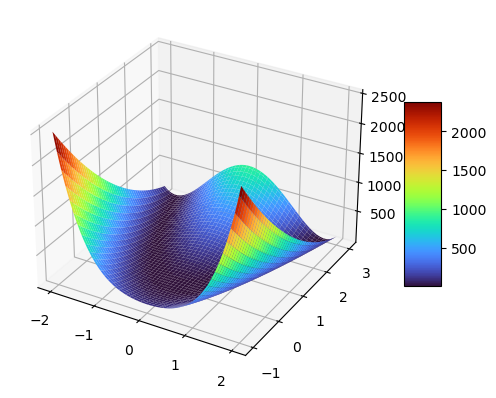

In [60]:
from matplotlib import cm
"""
Create a function to plot h.
"""
def plot_h(x,y):
    fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
    X, Y = np.meshgrid(x, y)
    H = h(X, Y)
    surface = ax.plot_surface(X, Y, H, cmap=cm.turbo)
    fig.colorbar(surface, shrink=0.5, aspect=5, )
    plt.show()
    
plot_h(x,y)

### Exercise 2.2
Knowing that a critical point of a function is a point where the gradient vanishes, show that $(1, 1)$ is the unique critical point of $h$.  Prove that this point is a minimum for $h$. 

YOUR ANSWER HERE

To find the minimum of the function we first find the gradient and set it equal to zero and solve for the parameters. So lets first take the partial derivatives:

$$
\begin{align}
h(x,y) &= 100(y - x^2)^2 +(1 - x)^2 \\
\frac{\partial h}{\partial x} &= -400(yx-x^3)-2(1-x)\\
\frac{\partial h}{\partial y} &= 200(y-x^2)
\end{align}
$$

Now set them to zero and solve:
$$
\begin{align}
200(y-x^2) &= 0\\
y &= x^2\\
-2(1-x) &= 0\\
x^* &= 1\\
y^* &= 1
\end{align}
$$



### Exercise 2.3
Write down the gradient descent iteration rule for function $h$. 

$$
\begin{align}
x^* &= x - \eta(-400(yx-x^3)-2(1-x))\\
y^* &= y - \eta(200(y-x^2))
\end{align}
$$

### Exercise 2.4
Implement gradient descent. Try some different values of $\eta$. Does the algorithm converge? How fast? Make plots of the trajectories on top of a contour plot of $h$. (Hint: have a look at the example contour_example.py on Brightspace for inspiration to plot contours of functions and trajectories). Report your findings. Explain why numerical minimization with gradient descent is slow for this function.

First implement the derivative of $h(x,y)$.

In [61]:
def dh_dxy(x, y):
    """
    This function is the derivative of the function h(x, y).
    
    Parameters
    ----------
    x : float
        data point from x-axis
    y : float
        data point from y-axis
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    """
    # YOUR CODE HERE
    dh_dx = -400*(y*x-x**3)-2*(1-x)
    dh_dy = 200*(y-x**2)
    return np.array([dh_dx, dh_dy])

In [62]:
"""
Test for dh_dxy.
"""
assert np.array_equal(dh_dxy(1, 1), np.array([0, 0]))

Now implement the gradient descent algorithm.

In [63]:
def grad_descent(grad, val_init, eta, max_iter, tol):
    """ This function implements the gradient descent algorithm.
    
    Parameters
    ----------
    grad : function
        Returns the derivative of the function with respect to the pair (x, y).
    val_init : tuple
        Initial values for parameters
    eta : float
        Gradient descent learning rate
    max_iter : int
        Maximum number of gradient descent iterations
    tol : float
        Tolerance for detecting convergence
    
    Returns
    -------
    vals : array
        NumPy array of parameter values computed during minimization
    dists : array
        NumPy array of distances from the current point to the previous point
    tot_iter : int
        Number of performed gradient descent iterations
    """
    # YOUR CODE HERE

    vals = [val_init]
    h_vals = [h(val_init[0], val_init[1])]
    dists = [0]
    tot_iter = 0


    for iteration in range(max_iter):
        gradient = grad(val_init[0], val_init[1])
        val_next = val_init - eta*gradient

        vals.append((val_next[0], val_next[1]))
        dists = math.dist(val_next, val_init)
        tot_iter += 1
        
        val_init = val_next
        h_val = h(val_next[0], val_next[1])
        h_vals.append(h_val)

        if h_val < tol:
            break

    return np.array(vals), np.array(dists), tot_iter


In [64]:
"""
Hidden test for grad_descent.
"""

'\nHidden test for grad_descent.\n'

Finally, run the gradient descent algorithm with different values of $\eta$.

In [66]:

x = np.random.rand()
y = np.random.rand()
tolerance = 0.005

etas = [0.001, 0.002, 0.003, 0.004]
for eta in etas:
    print(f"Eta = {eta}")
    vals, dists, tot_iter = grad_descent(dh_dxy, (x, y), eta, 8000, tolerance)
    print(f"Final position[x, y]: {vals[-1]}")
    h_val = h(vals[-1][0], vals[-1][1])
    print(f"h(x, y): {h_val}")
    print(f"Iterations: {tot_iter}")
    if h_val < tolerance:
        print(f"Converged within {tolerance} tolerance.")
    print('\n')

Eta = 0.001
Final position[x, y]: [0.92935162 0.86339951]
h(x, y): 0.004999891248951468
Iterations: 3842
Converged within 0.005 tolerance.


Eta = 0.002
Final position[x, y]: [0.92939967 0.86348902]
h(x, y): 0.0049930928872333
Iterations: 1921
Converged within 0.005 tolerance.


Eta = 0.003
Final position[x, y]: [0.78595562 0.56687171]
h(x, y): 0.30443325211379674
Iterations: 8000


Eta = 0.004
Final position[x, y]: [0.58025304 0.39962828]
h(x, y): 0.5722649476986388
Iterations: 8000




Explain what you see!

YOUR ANSWER HERE

It seems that for for sufficiently small learning rates $\eta=0.001, 0.002$, the algorithm converges within the tolerance range, however it does so more quickly for the larger learning rate. However if one increases $\eta>=0.003$ then the algorithm does not converge and in fact if increased too much it will result in a numerical overflow.